In [19]:
%%HTML
<iframe width="1000" height="500" src="note.html" frameborder="0"></iframe>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading Weight Loss Training set

In [3]:
# read data into a DataFrame
data = pd.read_csv('weight-loss.csv',index_col=0)
data.head()

,Calorie_Intake,Calorie_burned,Hours_of_Sleep,Weight_loss
1,1811,1951,7,0.039989
2,1818,1996,8,0.051402
3,2007,1969,8,-0.011018
4,1791,1942,7,0.042026
5,1698,1935,6,0.067540


**Features**
- Calorie_Intake: Total amount of calories intake per day ( Calculated by User food log)
- Calorie_burned: Total amount of calories burned per day
- Sleep: Total sleep duration per day

**Output**
- Weight loss: Measured change in weight in a day 

In [4]:
# print the shape of the DataFrame
data.shape

(50, 4)

There are 50 **Training set**.

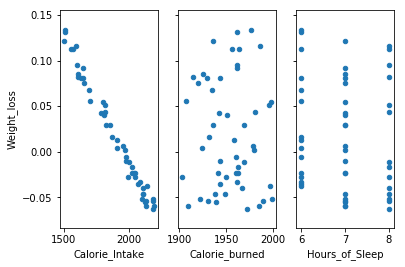

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Calorie_Intake', y='Weight_loss', ax=axs[0])
data.plot(kind='scatter', x='Calorie_burned', y='Weight_loss', ax=axs[1])
data.plot(kind='scatter', x='Hours_of_Sleep', y='Weight_loss', ax=axs[2])

In [6]:
import statsmodels.formula.api as smf
# create a fitted model with all three features
lm = smf.ols(formula='Weight_loss ~  Calorie_burned + Calorie_Intake + Hours_of_Sleep', data=data).fit()

# print the coefficients
lm.params

Intercept        -0.034663
Calorie_burned    0.000299
Calorie_Intake   -0.000280
Hours_of_Sleep   -0.000464
dtype: float64

In [7]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_loss   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.40e-67
Time:                        00:05:00   Log-Likelihood:                 238.67
No. Observations:                  50   AIC:                            -469.3
Df Residuals:                      46   BIC:                            -461.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0347      0.024     -1.464      0.150      -0.082       0.013
Calorie_burned     0.0003   1.22e-05     24.427      0.000       0.000       0.000
Calorie_Intake    -0.0003   1.41e-06   -198.597      0.000      -0.000      -0.000
Hours_of_Sleep    -0.0005      0.000     -1.164      0.250      -0.001       0.000
==============================================================================
Omnibus:                        1.874   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.035
Skew:                           0.268   Prob(JB):                        0.596
Kurtosis:                       3.457   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# create X and y
feature_cols = ['Calorie_Intake', 'Calorie_burned', 'Hours_of_Sleep']
X = data[feature_cols]
y = data.Weight_loss

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

-0.034663213976
[-0.00027962  0.00029914 -0.00046441]


In [9]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('Calorie_Intake', -0.0002796168900523755),
 ('Calorie_burned', 0.0002991362252648373),
 ('Hours_of_Sleep', -0.00046441332896657761)]

In [10]:
data = pd.read_csv('weight-loss-more-features.csv',index_col=0)
data.head()

,Calorie_Intake,Calorie_burned,Hours_of_Sleep,Weight_loss,Diet_Carbs,Diet_fat
1,1796,1940,6,0.041365,1,0
2,1856,1923,7,0.017938,0,1
3,1822,1907,7,0.023377,0,1
4,1950,1902,7,-0.012662,0,1
5,1909,1927,7,0.004747,0,1


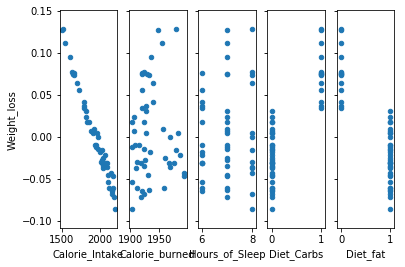

In [11]:
fig, axs = plt.subplots(1, 5, sharey=True)
data.plot(kind='scatter', x='Calorie_Intake', y='Weight_loss', ax=axs[0])
data.plot(kind='scatter', x='Calorie_burned', y='Weight_loss', ax=axs[1])
data.plot(kind='scatter', x='Hours_of_Sleep', y='Weight_loss', ax=axs[2])
data.plot(kind='scatter', x='Diet_Carbs', y='Weight_loss', ax=axs[3])
data.plot(kind='scatter', x='Diet_fat', y='Weight_loss', ax=axs[4])

In [12]:
feature_cols = ['Calorie_Intake', 'Calorie_burned', 'Hours_of_Sleep','Diet_Carbs', 'Diet_fat']
X = data[feature_cols]
y = data.Weight_loss

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('Calorie_Intake', -0.00027892387046268873),
 ('Calorie_burned', 0.00029010809618369818),
 ('Hours_of_Sleep', -0.0011985890341781487),
 ('Diet_Carbs', -0.00028964642079901706),
 ('Diet_fat', 0.00028964642079901695)]

In [13]:
mean_intake=data["Calorie_Intake"].mean()
mean_burned=data["Calorie_burned"].mean()
mean_sleep=data["Hours_of_Sleep"].mean()
print mean_intake
print mean_burned
print mean_sleep

1926.24
1935.74
6.96


In [14]:
meanLoss = lm.predict([[mean_intake, mean_burned,mean_sleep,0,1]])

In [15]:
future_days = 30

In [16]:
future_weight_loss = meanLoss[0] * future_days

In [17]:
future_weight_loss

0.081734076289423516

In [18]:
if(future_weight_loss < 0):
      print "You will gain weight(in lbs) : " , future_weight_loss
else:
      print "You will loss weight(in lbs) : " , future_weight_loss

You will loss weight(in lbs) :  0.0817340762894
